**Analysis of the Apnea ECG data derived from Physionet database for 70 persons**

Source: https://archive.physionet.org/physiobank/database/apnea-ecg/additional-information.txt

In [ ]:

import pandas as pd
df = pd.read_csv('/content/sample_data/Physionet_data.txt',sep="\t",names=["Record","Length_in_mins","non_apn_mins","apnea_mins","hours_with_apnea","AI","HI","AHI","Age","Sex","height(cm)","weight(kg)"],index_col=False)

df

,Record,Length_in_mins,non_apn_mins,apnea_mins,hours_with_apnea,AI,HI,AHI,Age,Sex,height(cm),weight(kg)
0,Record,Length,non-apn,apnea,hours,AI,HI,AHI,Age,Sex,height,weight
1,NaN,minutes,minutes,minutes,w/apnea,NaN,NaN,NaN,NaN,NaN,(cm),(kg)
2,a01,490,20,470,9,12.5,57.1,69.6,51,M,175,102
3,a02,529,109,420,9,57.2,12.3,69.5,38,M,180,120
4,a03,520,274,246,9,38.4,0.7,39.1,54,M,168,80
...,...,...,...,...,...,...,...,...,...,...,...,...
67,x31,558,42,516,10,86.8,6.7,93.5,29,F,183,100
68,x32,539,114,425,9,63.3,8.5,71.8,29,F,183,100
69,x33,474,471,3,0,0.13,0,0.13,28,F,169,57
70,x34,476,472,4,0,0.38,0,0.38,30,F,168,56


In [ ]:
# removing the top 2 columns and reseting the index column
apnea_data = df.drop(df.index[:2])

apnea_data.reset_index(drop=True, inplace=True)
apnea_data

,Record,Length_in_mins,non_apn_mins,apnea_mins,hours_with_apnea,AI,HI,AHI,Age,Sex,height(cm),weight(kg)
0,a01,490,20,470,9,12.5,57.1,69.6,51,M,175,102
1,a02,529,109,420,9,57.2,12.3,69.5,38,M,180,120
2,a03,520,274,246,9,38.4,0.7,39.1,54,M,168,80
3,a04,493,40,453,9,73.4,4,77.4,52,M,173,121
4,a05,455,179,276,8,35,6,41,58,M,176,78
...,...,...,...,...,...,...,...,...,...,...,...,...
65,x31,558,42,516,10,86.8,6.7,93.5,29,F,183,100
66,x32,539,114,425,9,63.3,8.5,71.8,29,F,183,100
67,x33,474,471,3,0,0.13,0,0.13,28,F,169,57
68,x34,476,472,4,0,0.38,0,0.38,30,F,168,56


In [ ]:
apnea_data

,Record,Length_in_mins,non_apn_mins,apnea_mins,hours_with_apnea,AI,HI,AHI,Age,Sex,height(cm),weight(kg)
0,a01,490,20,470,9,12.5,57.1,69.6,51,M,175,102
1,a02,529,109,420,9,57.2,12.3,69.5,38,M,180,120
2,a03,520,274,246,9,38.4,0.7,39.1,54,M,168,80
3,a04,493,40,453,9,73.4,4,77.4,52,M,173,121
4,a05,455,179,276,8,35,6,41,58,M,176,78
...,...,...,...,...,...,...,...,...,...,...,...,...
65,x31,558,42,516,10,86.8,6.7,93.5,29,F,183,100
66,x32,539,114,425,9,63.3,8.5,71.8,29,F,183,100
67,x33,474,471,3,0,0.13,0,0.13,28,F,169,57
68,x34,476,472,4,0,0.38,0,0.38,30,F,168,56


**Converting the Numerical data into int64 datatype**

In [ ]:
#apnea_data['AHI'] = apnea_data['AHI'].astype(int)

apnea_data['AHI'] = pd.to_numeric(apnea_data['AHI'])
apnea_data['Length_in_mins'] = pd.to_numeric(apnea_data['Length_in_mins'])
apnea_data['non_apn_mins'] = pd.to_numeric(apnea_data['non_apn_mins'])
apnea_data['apnea_mins'] = pd.to_numeric(apnea_data['apnea_mins'])
apnea_data['hours_with_apnea'] = pd.to_numeric(apnea_data['hours_with_apnea'])
apnea_data['AI'] = pd.to_numeric(apnea_data['AI'])
apnea_data['HI'] = pd.to_numeric(apnea_data['HI'])
apnea_data['Age'] = pd.to_numeric(apnea_data['Age'])
apnea_data['height(cm)'] = pd.to_numeric(apnea_data['height(cm)'])
apnea_data['weight(kg)'] = pd.to_numeric(apnea_data['weight(kg)'])

In [ ]:
apnea_data.dtypes

Record               object
Length_in_mins        int64
non_apn_mins          int64
apnea_mins            int64
hours_with_apnea      int64
AI                  float64
HI                  float64
AHI                 float64
Age                   int64
Sex                  object
height(cm)            int64
weight(kg)            int64
Patient_status       object
dtype: object

**Adding a new category column named "Patient_Status"**

In [ ]:
apnea_data['Patient_status']=" "

In [ ]:
apnea_data

,Record,Length_in_mins,non_apn_mins,apnea_mins,hours_with_apnea,AI,HI,AHI,Age,Sex,height(cm),weight(kg),Patient_status
0,a01,490,20,470,9,12.50,57.1,69.60,51,M,175,102,
1,a02,529,109,420,9,57.20,12.3,69.50,38,M,180,120,
2,a03,520,274,246,9,38.40,0.7,39.10,54,M,168,80,
3,a04,493,40,453,9,73.40,4.0,77.40,52,M,173,121,
4,a05,455,179,276,8,35.00,6.0,41.00,58,M,176,78,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,x31,558,42,516,10,86.80,6.7,93.50,29,F,183,100,
66,x32,539,114,425,9,63.30,8.5,71.80,29,F,183,100,
67,x33,474,471,3,0,0.13,0.0,0.13,28,F,169,57,
68,x34,476,472,4,0,0.38,0.0,0.38,30,F,168,56,


In [ ]:
apnea_data.describe()

,Length_in_mins,non_apn_mins,apnea_mins,hours_with_apnea,AI,HI,AHI,Age,height(cm),weight(kg)
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,491.828571,305.171429,186.657143,5.085714,21.858000,6.189571,28.047571,45.142857,175.842857,86.757143
std,31.576441,156.571692,172.275385,3.899992,24.101227,9.423092,27.537779,10.837784,5.588901,20.730455
min,401.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,158.000000,53.000000
25%,470.250000,180.750000,3.250000,0.000000,0.030000,0.000000,0.130000,38.000000,171.500000,69.750000
50%,496.000000,320.500000,178.000000,6.500000,14.200000,3.500000,21.000000,44.000000,177.000000,85.000000
75%,511.000000,453.250000,323.500000,9.000000,34.750000,8.900000,42.750000,53.750000,179.750000,102.000000
max,578.000000,535.000000,534.000000,10.000000,86.800000,57.100000,93.500000,63.000000,184.000000,135.000000


**The Persons having a AHI value >5 are considered to be Patients and the others are Healthy**

In [ ]:
#Patient_status column is updated with values
apnea_data.loc[apnea_data['AHI'] > 5, 'Patient_status'] = 'Patient'
apnea_data.loc[apnea_data['AHI'] <=5, 'Patient_status'] = 'Healthy'

In [ ]:
apnea_data.loc[apnea_data['Sex'] =='M', 'Sex'] = 'Male'
apnea_data.loc[apnea_data['Sex'] =='F', 'Sex'] = 'Female'

In [ ]:
apnea_data

,Record,Length_in_mins,non_apn_mins,apnea_mins,hours_with_apnea,AI,HI,AHI,Age,Sex,height(cm),weight(kg),Patient_status
0,a01,490,20,470,9,12.50,57.1,69.60,51,Male,175,102,Patient
1,a02,529,109,420,9,57.20,12.3,69.50,38,Male,180,120,Patient
2,a03,520,274,246,9,38.40,0.7,39.10,54,Male,168,80,Patient
3,a04,493,40,453,9,73.40,4.0,77.40,52,Male,173,121,Patient
4,a05,455,179,276,8,35.00,6.0,41.00,58,Male,176,78,Patient
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,x31,558,42,516,10,86.80,6.7,93.50,29,Female,183,100,Patient
66,x32,539,114,425,9,63.30,8.5,71.80,29,Female,183,100,Patient
67,x33,474,471,3,0,0.13,0.0,0.13,28,Female,169,57,Healthy
68,x34,476,472,4,0,0.38,0.0,0.38,30,Female,168,56,Healthy


**Plotting the Data to view the data distribution across all the records**

Count of number of Patients and healthy persons

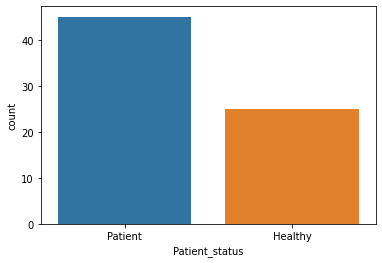

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=apnea_data, x='Patient_status')



In [ ]:
Patient_count=apnea_data['Patient_status'].value_counts()
Patient_count

Patient    45
Healthy    25
Name: Patient_status, dtype: int64

Gender wise distribution of Patients and Health people

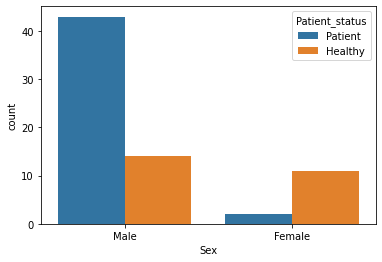

In [ ]:
sns.countplot(data=apnea_data, x='Sex',hue='Patient_status')

In [ ]:
apnea_data.groupby('Sex')['Patient_status'].value_counts()

Sex     Patient_status
Female  Healthy           11
        Patient            2
Male    Patient           43
        Healthy           14
Name: Patient_status, dtype: int64

Age wise count of Healthy people and patients

In [ ]:
apnea_data.groupby('Patient_status')['Age'].value_counts()

Patient_status  Age
Healthy         27     4
                31     4
                28     3
                30     2
                37     2
                39     2
                41     2
                42     2
                44     2
                52     2
Patient         51     5
                58     5
                44     4
                52     4
                53     4
                55     4
                60     3
                29     2
                38     2
                40     2
                43     2
                54     2
                57     2
                63     2
                39     1
                46     1
Name: Age, dtype: int64

Distribution based on Age

Most of the people having Apnea are avove the Age of 50

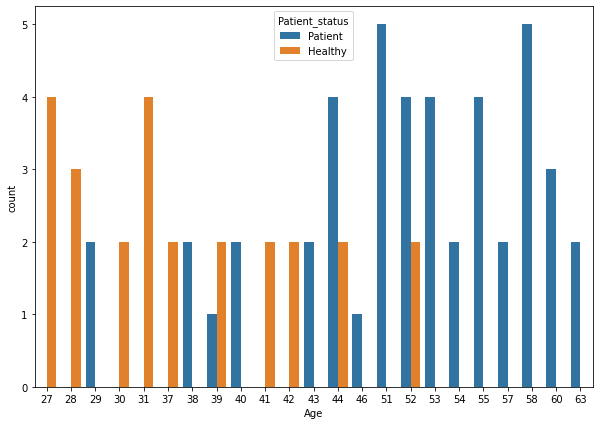

In [ ]:
countplt, ax = plt.subplots(figsize = (10,7))
ax=sns.countplot(data=apnea_data, x='Age',hue='Patient_status')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


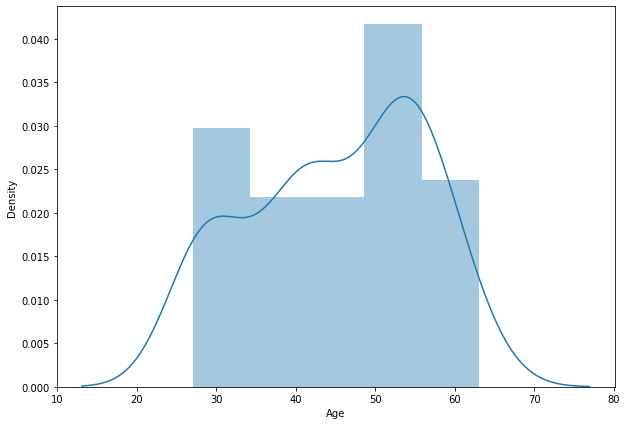

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,7))
ax1=sns.distplot(apnea_data['Age'],kde=True)


Distribution based on the Number of Apnea Hours

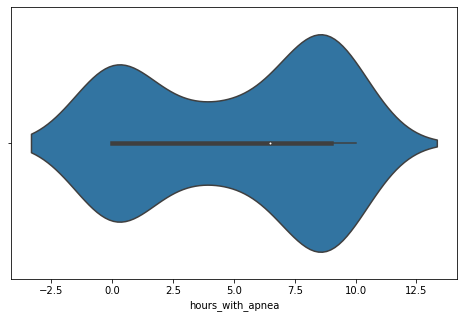

In [ ]:
fig, ax2 = plt.subplots(figsize = (8,5))
ax2 = sns.violinplot(x=apnea_data["hours_with_apnea"])

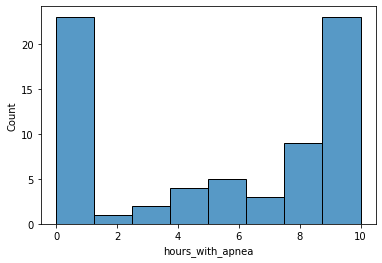

In [ ]:
sns.histplot(apnea_data['hours_with_apnea'])